<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/MNIST_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow
import tensorflow.keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import kerastuner as k

tensorflow.keras has some inbuilt datasets that we can import
keras.io/api/datasets

In [31]:
# pip install keras-tuner

In [32]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data() will give the total data

In [33]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
y_train.shape

(60000,)

imshow in matplotlib shows the image

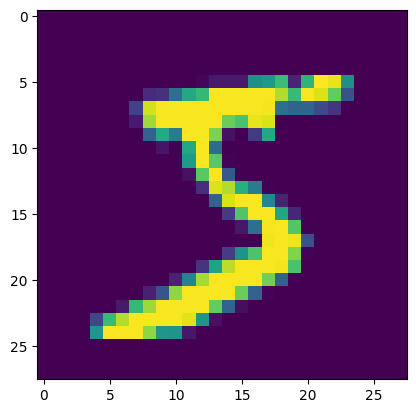

In [37]:
plt.imshow(x_train[0])

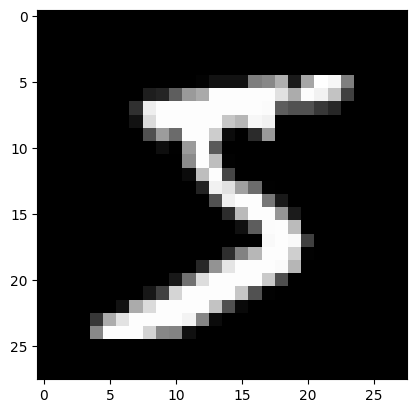

In [38]:
plt.imshow(x_train[0],cmap='gray')

keras also has another layer called Flatten. It will take any n-dim and convert to 1-d array

In [39]:
# using keras tuner
def tuners(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(100,activation= hp.Choice("activation in 1st hidden layer",values=['sigmoid','tanh','relu']),
                  kernel_initializer=hp.Choice("weight initializer in 1st hidden layer",values=['glorot_uniform','glorot_normal','he_uniform','he_normal']),
                  input_dim=2))
  model.add(Dense(40,activation=hp.Choice("activation in 2nd hidden layer",values=['sigmoid','tanh','relu']),
                   kernel_initializer=hp.Choice("weight initializer in 2nd hidden layer",values=['glorot_uniform','glorot_normal','he_uniform','he_normal']),
                  ))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer=hp.Choice("optimizer",values=['adam','adadelta','sgd']) ,metrics=['accuracy'])
  return model


In [40]:
tuner_obj = k.RandomSearch(tuners,max_trials=10,objective='val_accuracy',directory='folder1')

In [41]:
tuner_obj

In [42]:
tuner_obj.search(x_train,y_train,batch_size=100,epochs=20,validation_split=0.2) # here actual training starts

Trial 10 Complete [00h 01m 23s]
val_accuracy: 0.9310833215713501

Best val_accuracy So Far: 0.9313333630561829
Total elapsed time: 00h 13m 14s


In [43]:
tuner_obj.results_summary()

Results summary
Results in folder1/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
activation in 1st hidden layer: tanh
weight initializer in 1st hidden layer: he_uniform
activation in 2nd hidden layer: tanh
weight initializer in 2nd hidden layer: he_uniform
optimizer: adam
Score: 0.9313333630561829

Trial 06 summary
Hyperparameters:
activation in 1st hidden layer: tanh
weight initializer in 1st hidden layer: he_uniform
activation in 2nd hidden layer: tanh
weight initializer in 2nd hidden layer: glorot_uniform
optimizer: adam
Score: 0.9311666488647461

Trial 09 summary
Hyperparameters:
activation in 1st hidden layer: tanh
weight initializer in 1st hidden layer: he_normal
activation in 2nd hidden layer: sigmoid
weight initializer in 2nd hidden layer: glorot_normal
optimizer: adam
Score: 0.9310833215713501

Trial 01 summary
Hyperparameters:
activation in 1st hidden layer: tanh
weight initializer in 1st hidden laye

In [44]:
tuner_obj.get_best_hyperparameters()[0].values

{'activation in 1st hidden layer': 'tanh',
 'weight initializer in 1st hidden layer': 'he_uniform',
 'activation in 2nd hidden layer': 'tanh',
 'weight initializer in 2nd hidden layer': 'he_uniform',
 'optimizer': 'adam'}

In [45]:
model = tuner_obj.get_best_models(num_models=1)[0]

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 82,950
Trainable params: 82,950
Non-trainable params: 0
_________________________________________________________________


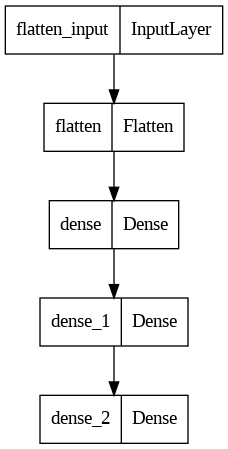

In [47]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [48]:
# model.get_weights()

In [49]:
predict = np.argmax(model.predict(x_test),axis=1) # row wise we want to get the index value of highest probability, so classification prediction done

313/313 [==============================] - 1s 2ms/step


In [50]:
accuracy_score(y_test,predict)

0.9269

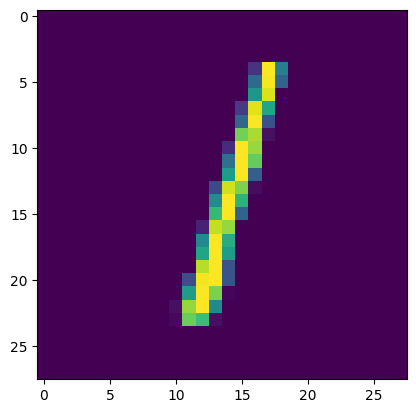

In [51]:
plt.imshow(x_test[2])

In [52]:
print(predict[2])

1
